In [37]:
#Required libraries for EDA

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [39]:
#read the dataset of "Banking campaigns" in data
data = pd.read_csv("Casestudy Data.csv")

#printing the head and tail of the data
data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [40]:
data.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [41]:
#dropping records with age missing
data = data[~data.age.isnull()].copy()
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    4672
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [42]:
#dropping cons.price.idx records missing in the dataset
data = data[~data['cons.price.idx'].isnull()].copy()

data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [43]:
#columns in dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [44]:
data.shape

(32772, 21)

In [45]:
#finding the amount of unique values in each column
for cols in data.columns:
    print(cols)
    print(data[cols].unique)
    print("--" * 50)

age
<bound method Series.unique of 0        56.0
1        57.0
3        40.0
5        45.0
6        59.0
         ... 
41181    37.0
41183    73.0
41184    46.0
41186    44.0
41187    74.0
Name: age, Length: 32772, dtype: float64>
----------------------------------------------------------------------------------------------------
job
<bound method Series.unique of 0          housemaid
1           services
3             admin.
5           services
6             admin.
            ...     
41181         admin.
41183        retired
41184    blue-collar
41186     technician
41187        retired
Name: job, Length: 32772, dtype: object>
----------------------------------------------------------------------------------------------------
marital
<bound method Series.unique of 0        married
1        married
3        married
5        married
6        married
          ...   
41181    married
41183    married
41184    married
41186    married
41187    married
Name: marital, Length: 32772, dtyp

In [46]:
# List of numerical columns in the dataset
nums = list(data.select_dtypes(exclude=['object']))
nums

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [47]:
# List of categorical columns in the dataset
category_cols = list(data.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

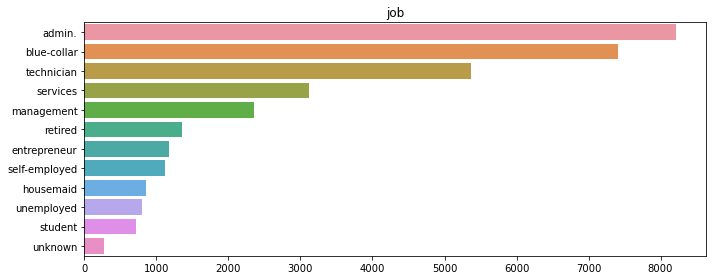

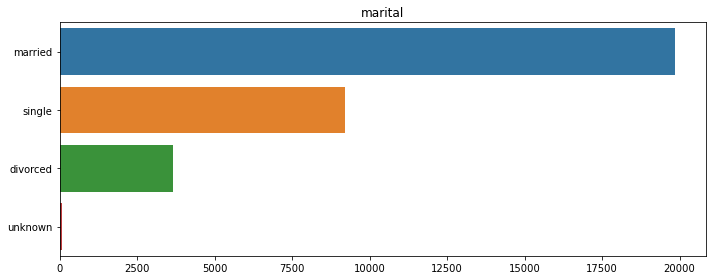

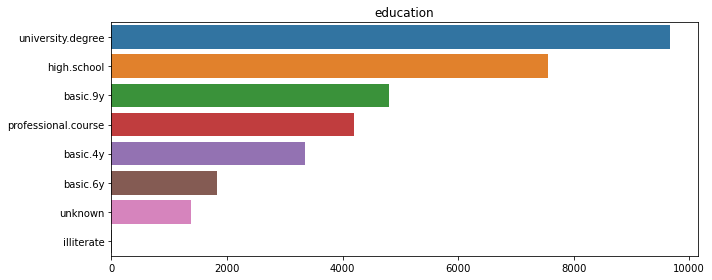

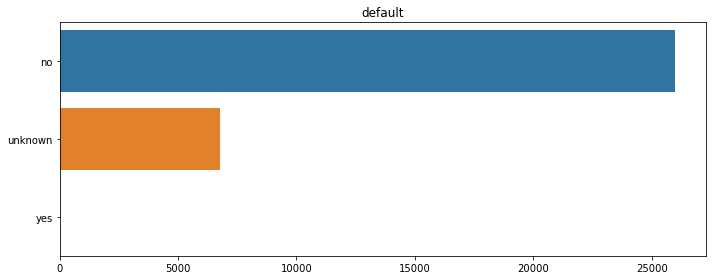

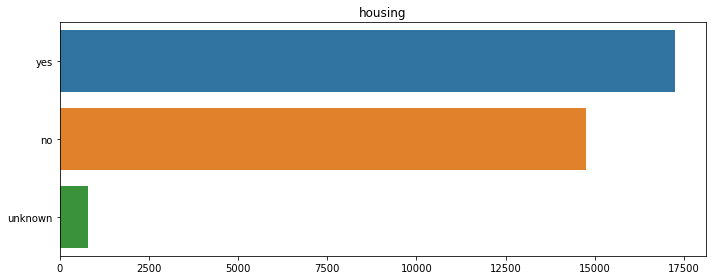

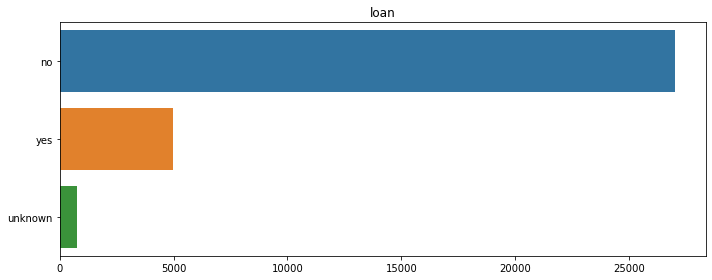

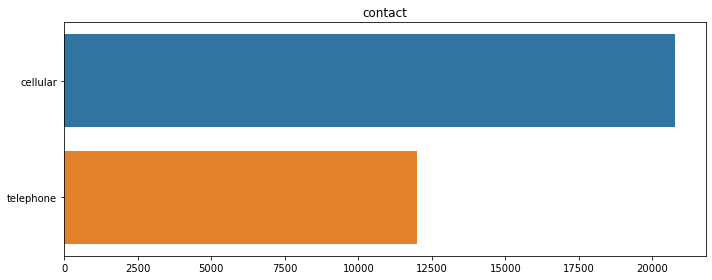

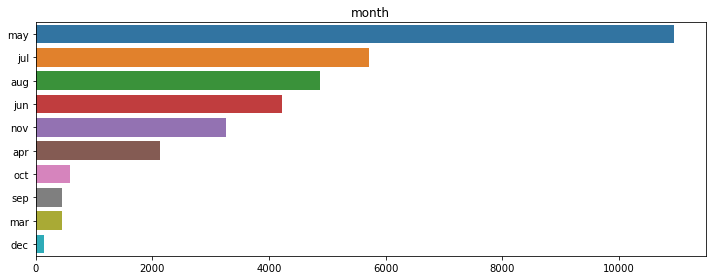

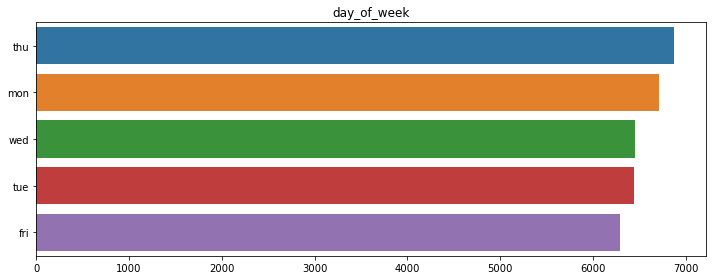

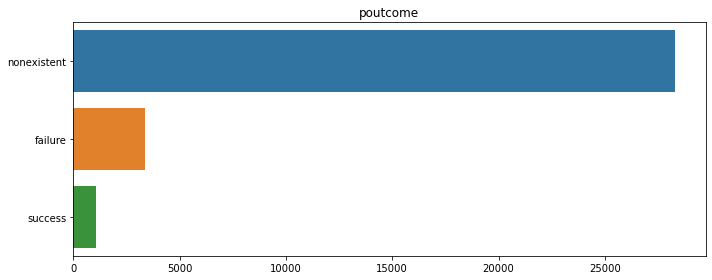

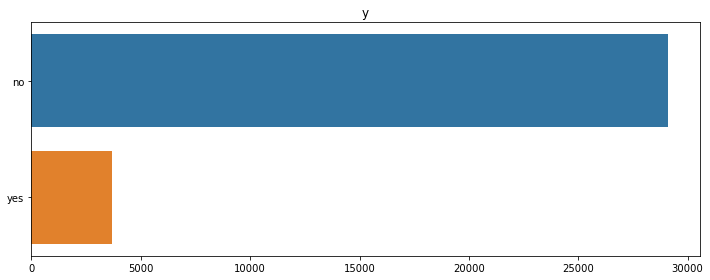

In [48]:
#plotting the bar grah to find out the number of occurances of values in each categorical column
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

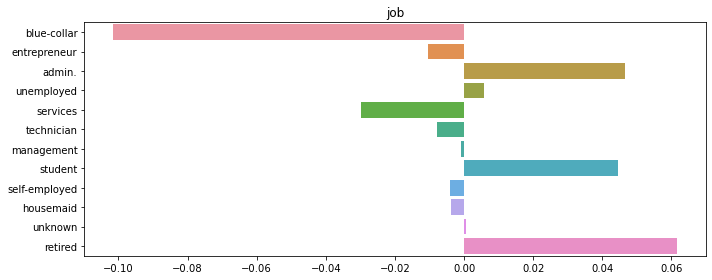

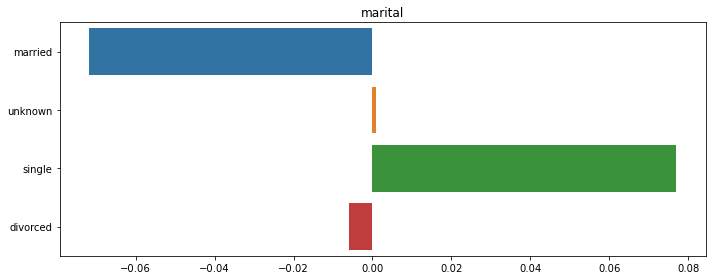

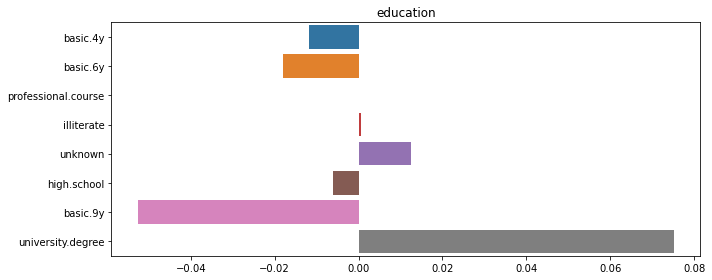

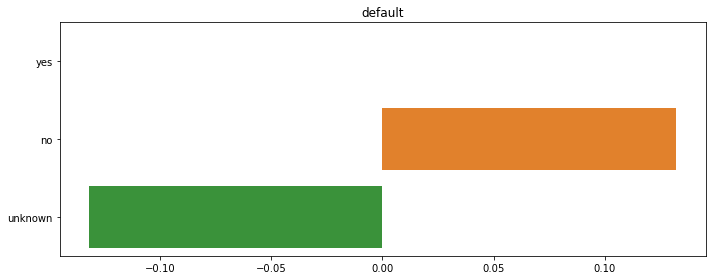

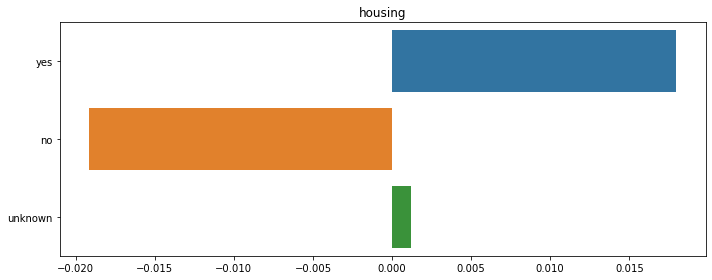

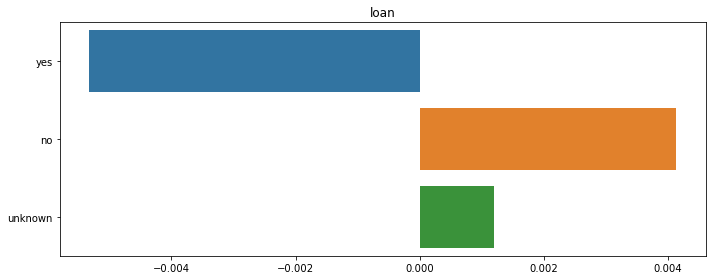

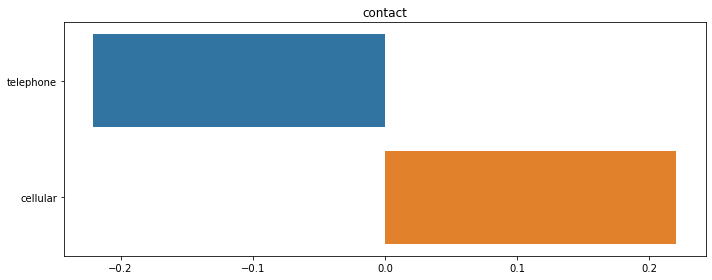

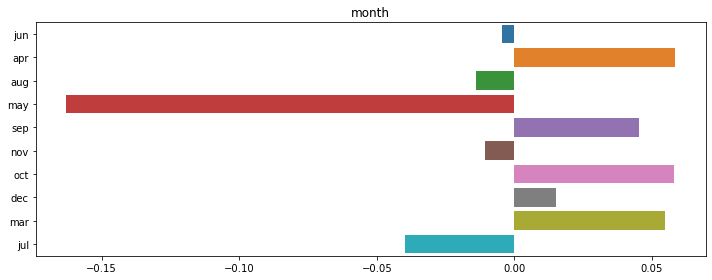

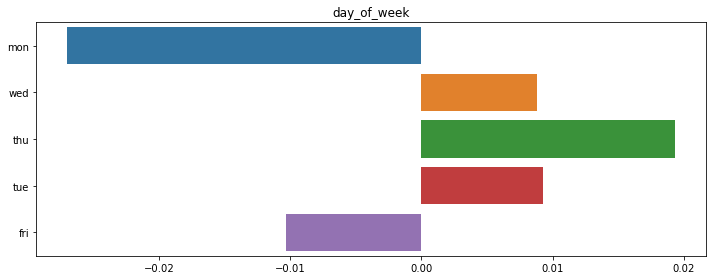

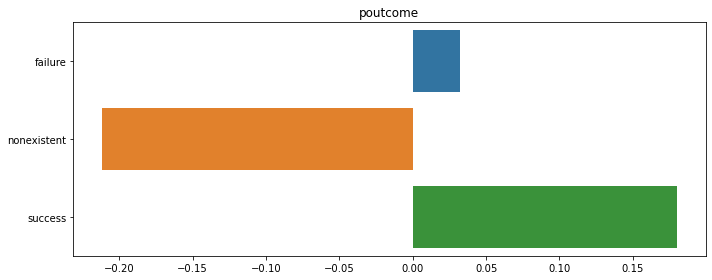

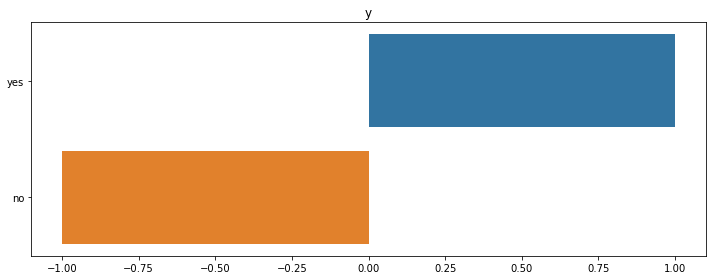

In [50]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = data.loc[data['y'].values == 'yes', col].value_counts() 
    neg_counts = data.loc[data['y'].values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (data['y'].values == 'yes').sum()
    freq_neg = (data['y'].values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [ ]:
#lets find out missing and/or uniknown values in the columns of the dataframe

data.default.replace('unknown','no',inplace=True)
df['default'] = df.default.replace('unknown',df.default.mode([0]))

df['default'] = df.default.replace('unknown',df.default.mode([0]))
df['loan'] = df.default.replace('unknown',df.loan.mode()[0])

In [ ]:
#Handling Outliers

In [ ]:
print(data.job.value_counts(normalize=True))

data.job.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
print(data.education.value_counts(normalize=True))

data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
#Scatter plot

In [ ]:
data.plot.scatter(x='age',y='balance')
plt.show()

In [ ]:
sns.pairplot(data=data, vars=['age','balance'])
plt.show()